In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C is Acer
 Volume Serial Number is D45B-9DAD

 Directory of C:\Users\Sirjan Bhalla\Downloads\ML\Decision Trees

23-02-2021  10:23 AM    <DIR>          .
23-02-2021  10:23 AM    <DIR>          ..
22-02-2021  12:56 PM    <DIR>          .ipynb_checkpoints
23-02-2021  10:23 AM         1,168,604 CU_Decision_tree_Training.ipynb
18-02-2021  12:38 PM            60,302 titanic.csv
23-02-2021  10:53 AM            24,846 tree.dot
23-02-2021  10:53 AM           835,453 tree.png
               4 File(s)      2,089,205 bytes
               3 Dir(s)  214,212,046,848 bytes free


In [3]:
df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df [['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [5]:
df['Sex']= df['Sex'].map({'male':0,'female':1 })

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,0,22.0,1,0,7.2500
2,1,1,1,38.0,1,0,71.2833
3,1,3,1,26.0,0,0,7.9250
4,1,1,1,35.0,1,0,53.1000
5,0,3,0,35.0,0,0,8.0500


In [7]:
df.info

<bound method DataFrame.info of              Survived  Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                                    
1                   0       3    0  22.0      1      0   7.2500
2                   1       1    1  38.0      1      0  71.2833
3                   1       3    1  26.0      0      0   7.9250
4                   1       1    1  35.0      1      0  53.1000
5                   0       3    0  35.0      0      0   8.0500
...               ...     ...  ...   ...    ...    ...      ...
887                 0       2    0  27.0      0      0  13.0000
888                 1       1    1  19.0      0      0  30.0000
889                 0       3    1   NaN      1      2  23.4500
890                 1       1    0  26.0      0      0  30.0000
891                 0       3    0  32.0      0      0   7.7500

[891 rows x 7 columns]>

In [8]:
#df = df.dropna()
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
df.info

<bound method DataFrame.info of              Survived  Pclass  Sex        Age  SibSp  Parch     Fare
PassengerId                                                         
1                   0       3    0  22.000000      1      0   7.2500
2                   1       1    1  38.000000      1      0  71.2833
3                   1       3    1  26.000000      0      0   7.9250
4                   1       1    1  35.000000      1      0  53.1000
5                   0       3    0  35.000000      0      0   8.0500
...               ...     ...  ...        ...    ...    ...      ...
887                 0       2    0  27.000000      0      0  13.0000
888                 1       1    1  19.000000      0      0  30.0000
889                 0       3    1  29.699118      1      2  23.4500
890                 1       1    0  26.000000      0      0  30.0000
891                 0       3    0  32.000000      0      0   7.7500

[891 rows x 7 columns]>

In [10]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [11]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.000000,1,0,7.2500
2,1,1,38.000000,1,0,71.2833
3,3,1,26.000000,0,0,7.9250
4,1,1,35.000000,1,0,53.1000
5,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
887,2,0,27.000000,0,0,13.0000
888,1,1,19.000000,0,0,30.0000
889,3,1,29.699118,1,2,23.4500


In [12]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
710,3,0,29.699118,1,1,15.2458
440,2,0,31.000000,0,0,10.5000
841,3,0,20.000000,0,0,7.9250
721,2,1,6.000000,0,1,33.0000
40,3,1,14.000000,1,0,11.2417
...,...,...,...,...,...,...
881,2,1,25.000000,0,1,26.0000
426,3,0,29.699118,0,0,7.2500
102,3,0,29.699118,0,0,7.8958


In [15]:
from sklearn import tree

In [16]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')

In [17]:
model

DecisionTreeClassifier(criterion='entropy')

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
y_predict = model.predict(X_test)

In [20]:
y_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [21]:
y_test

PassengerId
710    1
440    0
841    0
721    1
40     1
      ..
881    1
426    0
102    0
200    0
425    0
Name: Survived, Length: 223, dtype: int64

In [22]:
# Calculate the Accuracy score

In [35]:
from sklearn.metrics import accuracy_score

acc_dt= accuracy_score(y_predict,y_test )
acc_dt

0.7488789237668162

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_predict,y_test)

array([[111,  33],
       [ 23,  56]], dtype=int64)

In [25]:
cm= pd.DataFrame(confusion_matrix(y_predict,y_test), columns= ['Predicted not surived', 'Predicted Survived'], index = [ 'True not survived', 'True Survival'])

In [26]:
cm

,Predicted not surived,Predicted Survived
True not survived,111,33
True Survival,23,56


In [27]:
#Install one library from Anaconda prompt by typing 
#"conda install -c anaconda graphviz"

#To install this package with conda run in anaconda prompt:
#conda install -c conda-forge pydotplus

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot', feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [29]:
dot_data = tree.export_graphviz(model,
                                feature_names=X.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)

In [30]:
!dot -Tpng tree.dot > tree.png

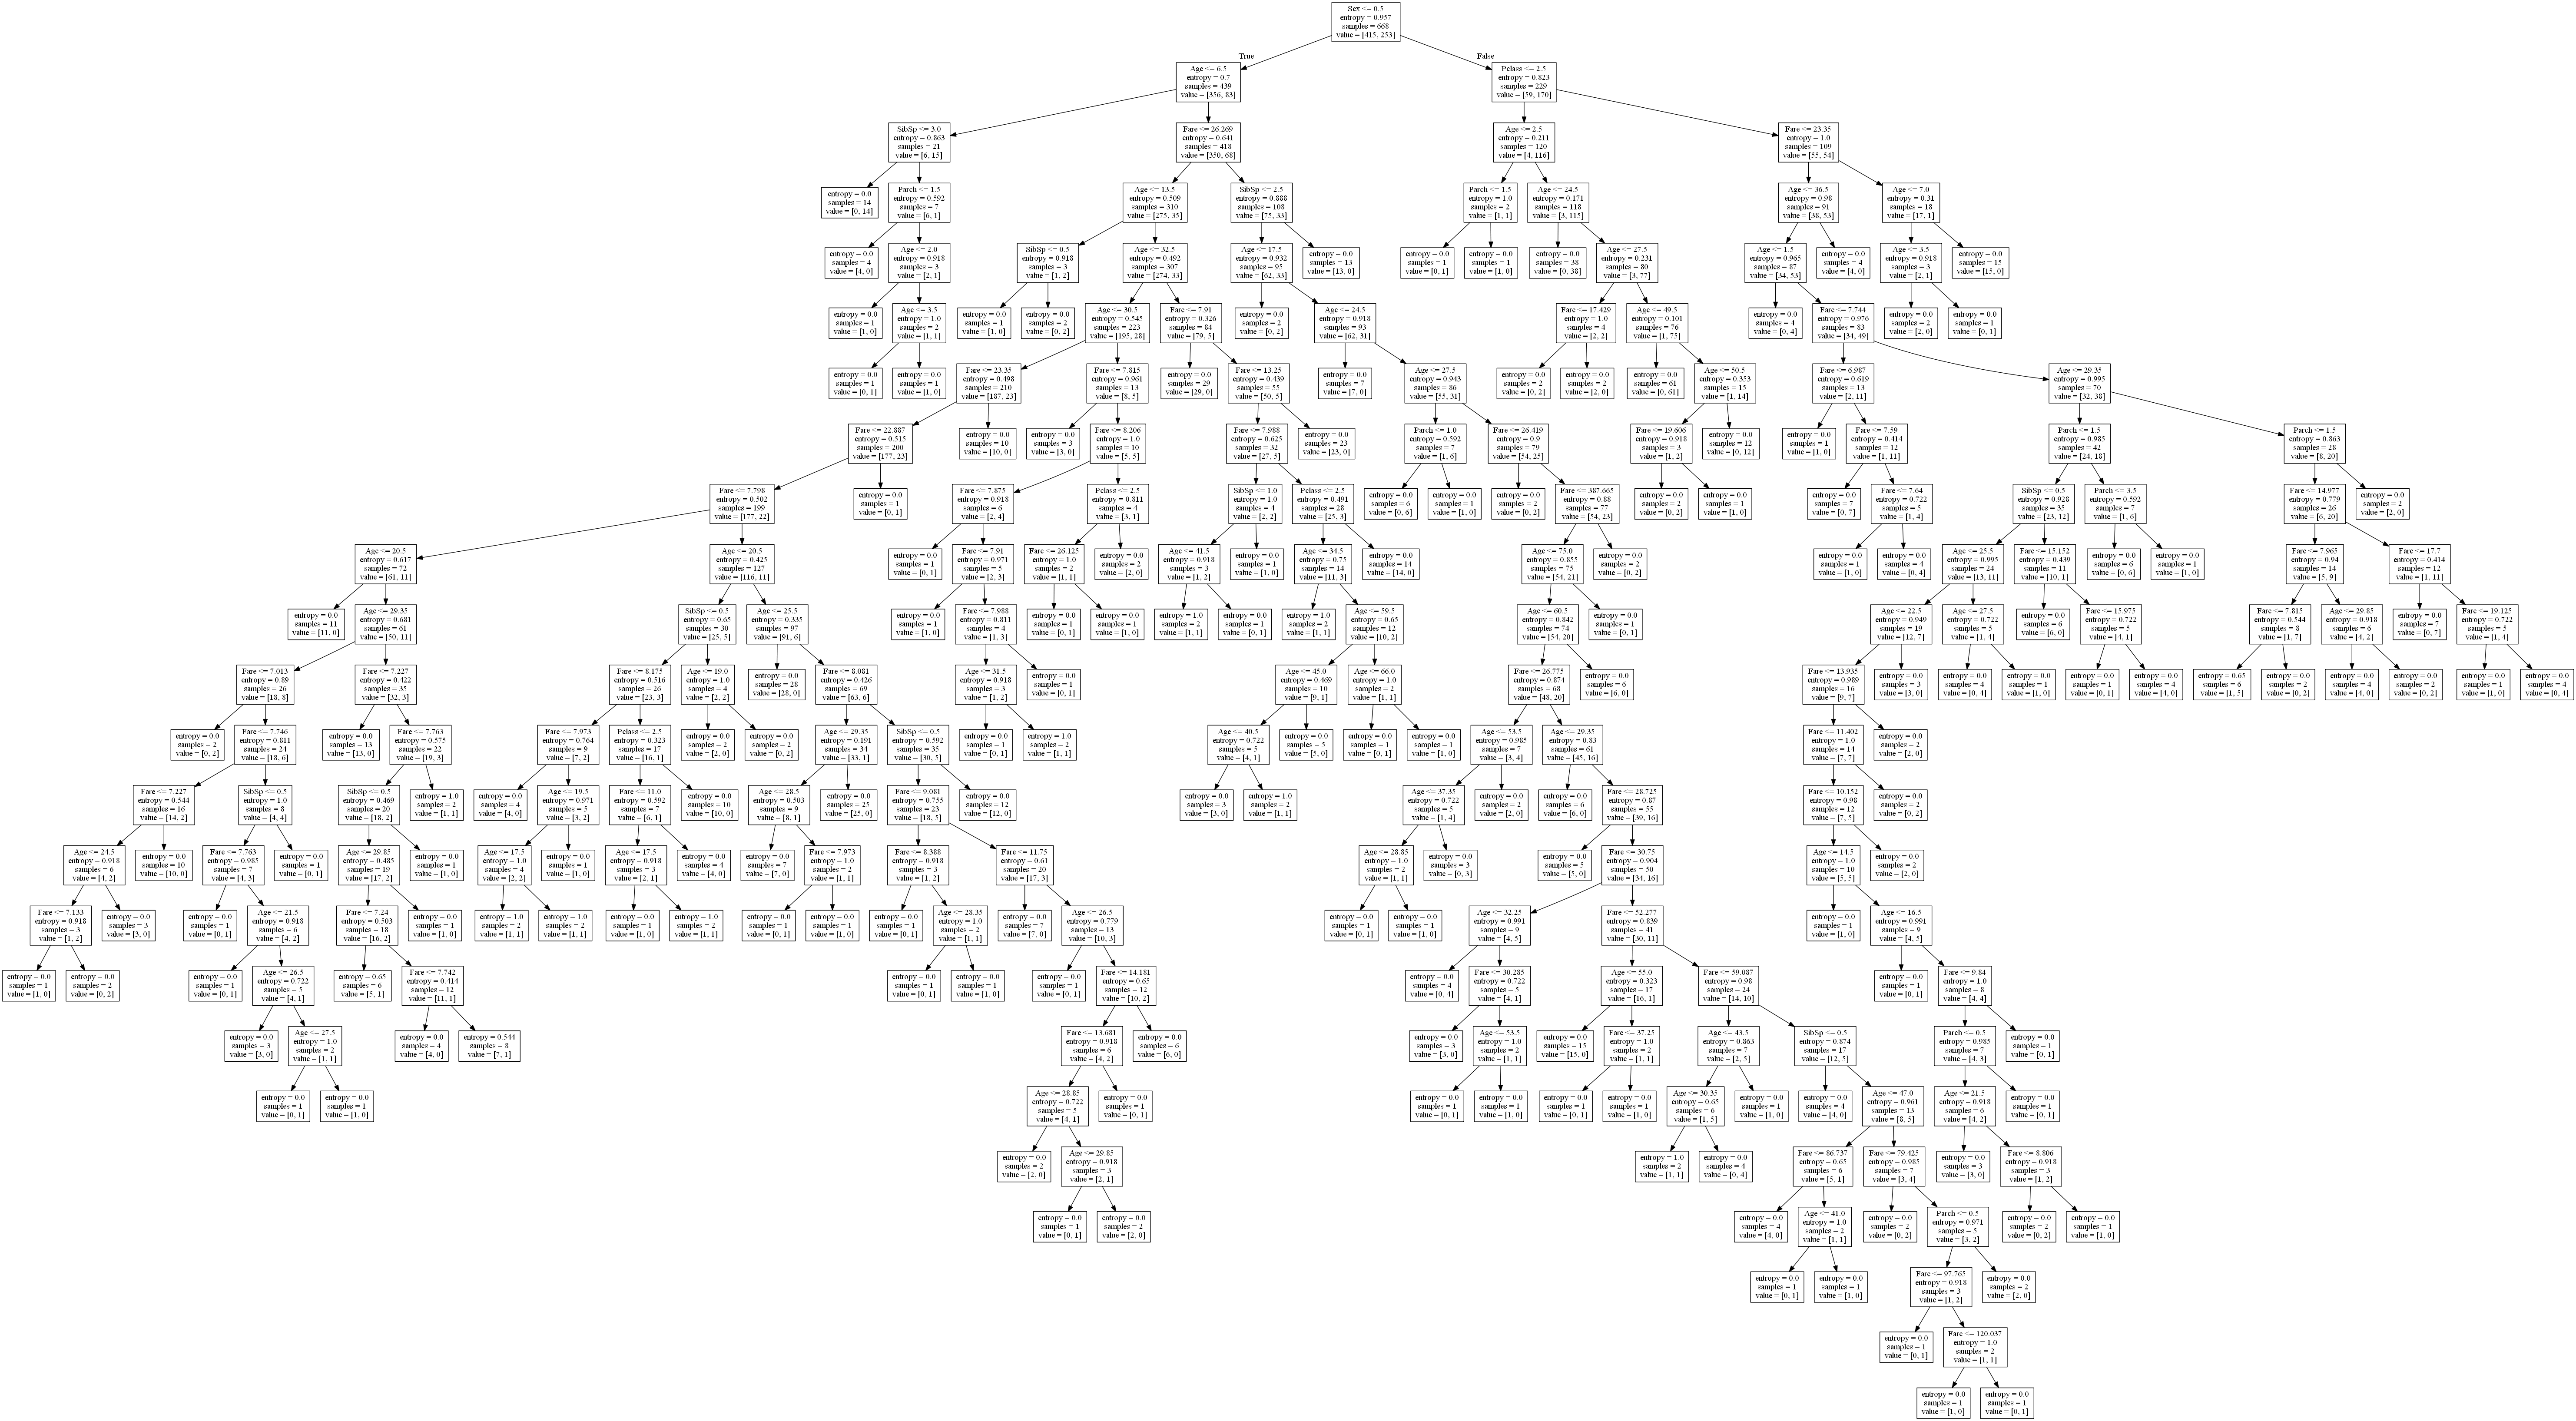

In [31]:
from IPython.display import Image
Image(filename='tree.png')

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_log = model.predict(X_test)
Log_accuracy=accuracy_score(y_pred_log,y_test)
print(Log_accuracy,"Accuracy score from logical regression")

0.8071748878923767 Accuracy score from logical regression


In [33]:
confusion_matrix(y_pred_log,y_test)

array([[116,  25],
       [ 18,  64]], dtype=int64)

In [34]:
confusion_matrix(y_predict,y_test)

array([[111,  33],
       [ 23,  56]], dtype=int64)

# Overfitting and Underfitting

In [44]:
# fitting decision tree model
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(criterion = 'entropy')
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [54]:
# accuracy score from decision tree
from sklearn.metrics import accuracy_score

acc_dt= accuracy_score(y_predict,y_test )
print(acc_dt,"Accuracy score from decision tree")
print("above is overfitting")

0.7488789237668162 Accuracy score from decision tree
above is overfitting


In [56]:
# checking the accuracy of logistic regression with training data

y_pred_dt_train = model_dt.predict(X_train)
dt_accuracy_train=accuracy_score(y_pred_dt_train,y_train)
print(dt_accuracy_train,"accuracy of logistic regression with training data")

# #checking accuracy with testing data
# y_pred_dt_test = model_dt.predict(X_test)
# dt_accuracy=accuracy_score(y_pred_dt_test,y_test)
# print(dt_accuracy,"accuracy of logical regression with testing data")

0.9820359281437125 accuracy of logistic regression with training data
